In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, classification_report


In [ ]:
!pip install -U xgboost

     |████████████████████████████████| 173.6 MB 8.1 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

In [ ]:
accuracy_scores=[]

In [ ]:
%cd /content/drive/MyDrive/Project/Features_PSSM

/content/drive/MyDrive/Project/Features_PSSM


In [ ]:
def classModel3(data):
  X= data.iloc[:,:-1].values
  y= data.iloc[:,-1].values
  
  le = LabelEncoder()
  print(y)
  y= le.fit_transform(y) 
  print(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

  model = XGBClassifier(tree_method='gpu_hist',use_label_encoder=False)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print('\nClassification report:\n', classification_report(y_test,y_pred))
  print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)
  print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

  print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
  print("\nRecall:",recall_score(y_test, y_pred, average=None))
  print("\nF1 score:",f1_score(y_test, y_pred, average=None))

In [ ]:
def automation(filenames):
  size= len(filenames)
  for i in range(size):
    print()
    print()
    print("Feature Name: ", filenames[i])
    print()
    data = pd.read_csv(filenames[i])
    classModel3(data)

In [ ]:
files= ['AADP_PSSM.csv', 'DPC_PSSM.csv', 'DFMCA_PSSM.csv', 'LPC_PSSM.csv', 'MBMGAC_PSSM.csv',
        'SOMA_PSSM.csv', 'SINGLE_AVERAGE_PSSM.csv', 'SVD_PSSM.csv',
        'AATP_TPCC.csv',
               'K_SEPERATED_BIGRAME.csv',
               'CS_PSE_PSSM.csv',
               'DWT_PSSM.csv',
               'EDP_MEDP.csv',
               'FPSSM.csv',
               'PSSMBLOCK.csv',
               'SCSH2.csv',
               'TRIGRAME_PSSM.csv',
                'combined_CS_PSE_MBMGAC.csv',
        'combined_pssm.csv'
               ]

In [ ]:
automation(files)



Feature Name:  AADP_PSSM.csv

['d' 'd' 'd' ... 'd' 'd' 'b']
[3 3 3 ... 3 3 1]
[06:21:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       772
           1       0.74      0.77      0.76       825
           2       0.84      0.89      0.87      1293
           3       0.70      0.63      0.66      1021

    accuracy                           0.78      3911
   macro avg       0.77      0.77      0.77      3911
weighted avg       0.77      0.78      0.78      3911

Confusion matrix: 
 [[ 598   33   54   87]
 [  29  637   38  121]
 [  27   35 1157   74]
 [  91  152  130  648]]


Accuracy: 0.7772948095116339


Precision: [0.80268456 0.74329055 0.83901378 0.69677419]

Rec

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 19 artists>

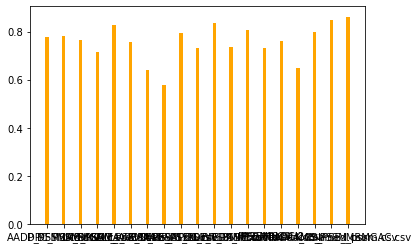

In [ ]:
plt.bar(files, accuracy_scores, color ='orange',width = 0.2)

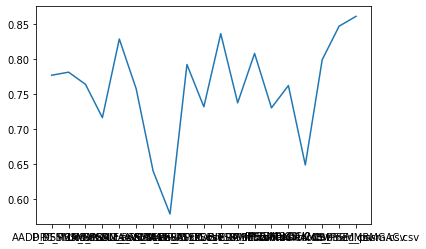

In [ ]:
plt.plot(files,accuracy_scores)

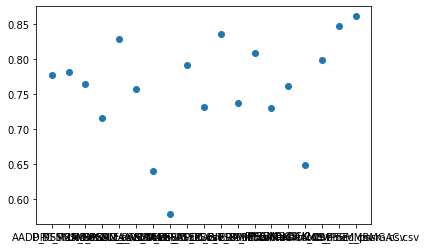

In [ ]:
plt.scatter(files,accuracy_scores)

In [ ]:
automation(['combined_pssm2.csv'])



Feature Name:  combined_pssm2.csv

['d' 'd' 'd' ... 'd' 'd' 'b']
[3 3 3 ... 3 3 1]
[11:14:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       772
           1       0.84      0.89      0.86       825
           2       0.92      0.91      0.91      1293
           3       0.80      0.77      0.78      1021

    accuracy                           0.86      3911
   macro avg       0.86      0.86      0.86      3911
weighted avg       0.86      0.86      0.86      3911

Confusion matrix: 
 [[ 674   14   25   59]
 [  13  736    8   68]
 [  18   23 1179   73]
 [  58  106   75  782]]


Accuracy: 0.8619278956788545


Precision: [0.88335518 0.83731513 0.91608392 0.79633401]

In [ ]:
df=pd.read_csv('combined_pssm2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13035 entries, 0 to 13034
Columns: 2501 entries, V1 to class
dtypes: float64(2500), object(1)
memory usage: 248.7+ MB


In [ ]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V522,V523,V524,V525,V526,V527,V528,V529,V530,V531,V532,V533,V534,V535,V536,V537,V538,V539,V540,V541,V542,V543,V544,V545,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,class
13030,0.3654,0.5481,0.1346,0.5385,1.2212,0.1635,0.1442,0.6058,0.5577,0.9712,0.7596,0.1827,0.4808,1.0769,0.4808,-0.0962,0.3846,1.4712,0.9135,0.8077,0.4423,1.4615,1.5385,1.7404,1.8077,1.0000,0.8558,2.2500,1.9615,1.0192,0.9327,0.8558,0.5192,1.8365,1.6635,0.4808,0.3942,2.6827,1.7596,0.5577,...,12073.540,8324.661,9009.777,10367.794,10741.985,11347.963,11845.120,9894.210,9790.654,9604.034,9811.387,8249.689,11333.534,9068.364,11134.687,10944.832,10786.400,10444.737,10148.434,8691.373,10141.109,11572.973,9722.879,11612.456,9926.958,10667.882,10279.962,11277.469,8096.723,9646.457,9915.719,9176.061,10704.678,11398.771,10360.027,11108.060,11440.514,9073.175,9461.005,b
13031,1.1848,1.5638,1.4769,2.9390,3.4769,2.3142,2.5730,1.2902,1.6839,3.4455,3.1460,1.9963,2.6636,2.8447,3.0092,1.0074,1.7468,3.1701,2.5102,3.0813,2.1738,8.1054,6.4325,8.6599,9.4399,6.8189,7.7468,6.3272,7.0518,6.5915,7.2255,7.7819,5.6081,8.3327,9.5360,3.7708,4.0296,11.1590,8.2865,5.7579,...,285189.563,270210.377,284524.032,285760.470,289639.180,279030.201,291426.924,281617.029,297360.561,289209.756,303970.588,305222.932,263991.587,312918.132,274252.516,289423.875,286208.487,250260.180,258445.318,279113.099,303599.930,277476.759,295937.265,286764.545,269295.107,299847.814,262075.343,272063.211,273705.950,291340.219,262958.914,285735.507,307587.675,299389.564,316437.921,294029.876,288840.762,287647.980,303895.461,d
13032,-1.1078,0.8627,0.8627,1.2255,1.7255,0.2451,1.0294,0.6765,0.3824,0.9706,1.2059,0.4804,1.4804,1.5588,0.2353,-0.5294,0.2157,2.9706,0.4216,0.5686,1.4804,3.0098,4.9804,4.7353,6.2843,2.7059,3.1961,6.5490,4.1961,1.7353,2.7451,3.2255,2.9314,4.6176,4.1373,3.0196,2.0980,7.1863,4.0098,1.3725,...,9383.070,8895.248,7725.012,9000.746,9148.814,9804.565,7810.699,9347.173,8952.810,9252.000,9572.844,9863.918,11063.819,10172.950,9611.596,10256.145,8807.302,8563.792,8221.450,7630.566,7724.258,10075.549,9068.439,11393.996,10420.071,9136.098,8969.857,8553.755,9134.992,8200.230,10471.817,8660.796,10948.821,11523.082,11647.923,9441.705,9310.609,8159.080,8141.003,d
13033,-1.3900,0.6900,0.4500,1.4400,1.7000,0.5700,0.8200,0.8800,0.3700,1.9300,1.8400,0.4500,1.1300,1.5400,0.7300,-0.2600,0.2500,2.6000,0.6200,0.8800,1.2300,2.4500,4.3000,4.3200,6.4000,2.3200,2.5200,5.8000,3.6100,2.3900,3.1100,2.3700,3.9200,5.0200,3.6200,3.0300,2.4200,7.2400,4.1600,1.7000,...,9511.905,7564.112,5991.858,9267.087,8277.213,10437.879,7109.106,9173.084,8229.919,9244.719,8614.721,9604.695,9501.081,9808.890,8292.907,9639.898,8867.434,7694.812,7912.598,6797.708,7622.866,8815.197,8374.518,10476.970,9327.930,9001.186,8467.499,8537.783,8385.003,7877.795,10565.884,8806.434,10773.072,10456.661,11102.445,8963.299,8891.549,7769.568,7952.767,d
13034,0.2966,0.6949,0.7288,0.8136,0.9492,0.4237,0.5000,1.5000,1.0508,0.0254,0.1610,0.5424,0.1017,0.9407,1.0763,0.2881,-0.1610,1.7288,0.8559,-0.0932,0.9153,1.6864,0.1949,0.8390,2.5339,0.2542,0.7881,2.1864,1.9407,1.1356,1.7034,1.0508,0.8983,2.6864,2.5085,0.1780,-0.4746,4.0678,2.2881,0.6949,...,14905.406,12894.636,12586.903,14565.620,12991.503,14405.129,14284.313,13785.671,14268.792,13302.212,13332.044,12749.355,14627.757,11696.120,14792.451,13010.033,12525.477,13947.020,12673.456,13955.177,11890.624,15401.463,11058.269,14172.514,13584.986,12807.883,14722.963,12748.542,13805.162,12068.708,12158.411,14458.614,16017.375,15627.743,14401.645,13713.625,13803.527,12025.509,11144.905,b


#Savinfg model in pickle file


In [ ]:
def saveModel(data):
  X= data.iloc[:,:-1].values
  y= data.iloc[:,-1].values
  le = LabelEncoder()
  print(y)
  y= le.fit_transform(y) 
  print(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

  model = XGBClassifier(tree_method='gpu_hist',use_label_encoder=False)
  model.fit(X_train, y_train)
  pickle.dump(model, open('model.pkl','wb'))

  y_pred = model.predict(X_test)

  print('\nClassification report:\n', classification_report(y_test,y_pred))
  print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)
  print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

  print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
  print("\nRecall:",recall_score(y_test, y_pred, average=None))
  print("\nF1 score:",f1_score(y_test, y_pred, average=None))

In [ ]:
df=pd.read_csv('combined_pssm2.csv')


In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
load_model=pickle.load(open("model.pkl","rb"))
print(load_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [ ]:
df.iloc[0,:-1].values

array([0.9877, 0.7669, 0.7147, ..., 94187.106, 96137.087, 101893.312],
      dtype=object)

In [ ]:
  X= df.iloc[:,:-1]
  y= df.iloc[:,-1]
  print(X)
  print(y)

           V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0      0.9877  0.7669  0.7147  0.7791  2.3712  0.4663  0.5644  1.5337  1.0644   
1      0.1183  0.4592  0.4479  0.5577  0.4423  0.2789  0.3775  0.6761  0.6141   
2      0.6753  0.9351  1.0390  1.8442  0.5844  0.8182  1.0649  1.6623  0.9870   
3     -0.0625  0.4167  0.7083  0.6771  0.5104  0.1042  0.3021  0.2708  0.9688   
4      2.0909  4.2576  4.5606  5.7576  4.9848  3.6364  4.7273  4.2121  5.4242   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
13030  0.3654  0.5481  0.1346  0.5385  1.2212  0.1635  0.1442  0.6058  0.5577   
13031  1.1848  1.5638  1.4769  2.9390  3.4769  2.3142  2.5730  1.2902  1.6839   
13032 -1.1078  0.8627  0.8627  1.2255  1.7255  0.2451  1.0294  0.6765  0.3824   
13033 -1.3900  0.6900  0.4500  1.4400  1.7000  0.5700  0.8200  0.8800  0.3700   
13034  0.2966  0.6949  0.7288  0.8136  0.9492  0.4237  0.5000  1.5000  1.0508   

          V10  ...        V

In [ ]:
le = LabelEncoder()
print(y)
y= le.fit_transform(y) 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

model = XGBClassifier(tree_method='gpu_hist',use_label_encoder=False)

0        d
1        d
2        d
3        d
4        a
        ..
13030    b
13031    d
13032    d
13033    d
13034    b
Name: class, Length: 13035, dtype: object
[3 3 3 ... 3 3 1]


In [ ]:
X_train.shape

(9124, 2500)

In [ ]:
model.fit(X_train, y_train)

[16:15:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
 y_pred = model.predict(X_test)

print('\nClassification report:\n', classification_report(y_test,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

accuracy = accuracy_score(y_test,y_pred)
accuracy_scores.append(accuracy)
print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\nF1 score:",f1_score(y_test, y_pred, average=None))


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       772
           1       0.84      0.89      0.86       825
           2       0.92      0.91      0.91      1293
           3       0.80      0.77      0.78      1021

    accuracy                           0.86      3911
   macro avg       0.86      0.86      0.86      3911
weighted avg       0.86      0.86      0.86      3911

Confusion matrix: 
 [[ 674   14   25   59]
 [  13  736    8   68]
 [  18   23 1179   73]
 [  58  106   75  782]]


Accuracy: 0.8619278956788545


Precision: [0.88335518 0.83731513 0.91608392 0.79633401]

Recall: [0.87305699 0.89212121 0.91183295 0.76591577]

F1 score: [0.8781759  0.86384977 0.91395349 0.78082876]


In [ ]:
pickle.dump(model, open("model.dat", "wb"))

In [ ]:
load_model = pickle.load(open("model.dat","rb"))
print(load_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [ ]:
type(df.iloc[0,:-1])

pandas.core.series.Series

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13035 entries, 0 to 13034
Columns: 2501 entries, V1 to class
dtypes: float64(2500), object(1)
memory usage: 248.7+ MB


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.shape

(3911, 2500)

In [ ]:
tmp=df.iloc[0,:-1]
type(tmp)
result=pd.DataFrame([tmp])
print(result)
print(type(result))

       V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0  0.9877  0.7669  0.7147  0.7791  2.3712  0.4663  0.5644  1.5337  1.0644   

      V10  ...       V551        V552        V553        V554       V555  \
0  2.1135  ...  95877.142  114070.624  108091.136  114669.085  99283.599   

         V556      V557       V558       V559        V560  
0  108429.814  99375.89  94187.106  96137.087  101893.312  

[1 rows x 2500 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
result.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560
0,0.9877,0.7669,0.7147,0.7791,2.3712,0.4663,0.5644,1.5337,1.0644,2.1135,...,95877.142,114070.624,108091.136,114669.085,99283.599,108429.814,99375.89,94187.106,96137.087,101893.312


In [ ]:
load_model.predict(result)

array([3])

In [ ]:
x.shape

(2500,)

In [ ]:
X_test

array([[-2.46600000e-01,  2.12300000e-01, -1.09600000e-01, ...,
         2.03364140e+04,  1.96093290e+04,  1.79076290e+04],
       [ 3.96400000e-01, -2.70300000e-01, -3.34230000e+00, ...,
         8.04879000e+03,  1.01401140e+04,  9.60064900e+03],
       [ 2.35800000e-01,  6.03000000e-01,  4.74600000e-01, ...,
         1.10699111e+05,  1.00982104e+05,  9.32007550e+04],
       ...,
       [ 2.54000000e-02,  1.01690000e+00,  8.30500000e-01, ...,
         1.14204440e+04,  1.30540070e+04,  1.45302370e+04],
       [-8.74000000e-02,  3.01000000e-01,  1.26200000e-01, ...,
         9.53949300e+03,  9.25253000e+03,  8.65143700e+03],
       [ 3.53000000e-02,  2.70600000e-01, -2.35000000e-02, ...,
         5.76700200e+03,  5.67108400e+03,  5.06099400e+03]])

In [ ]:
print(type(X_test))
print(X_test.shape)

<class 'numpy.ndarray'>
(3911, 2500)


In [ ]:
X_test[0]

array([-2.4660000e-01,  2.1230000e-01, -1.0960000e-01, ...,
        2.0336414e+04,  1.9609329e+04,  1.7907629e+04])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
x=df.iloc[0,:-1].values
x.shape


(2500,)

In [ ]:
cols_when_model_builds = load_model.get_booster().feature_names
print(cols_when_model_builds)

None


In [ ]:
res=load_model.predict(X_test)

In [ ]:
y=x.reshape(-1,1)

In [ ]:
y

array([[0.9877],
       [0.7669],
       [0.7147],
       ...,
       [94187.106],
       [96137.087],
       [101893.312]], dtype=object)

In [ ]:
names=load_model.get_booster().feature_names
print(names)

None


In [ ]:
def classModel3(data):
  X= data.iloc[:,:-1].values
  y= data.iloc[:,-1].values
  
  le = LabelEncoder()
  print(y)
  y= le.fit_transform(y) 
  print(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

  model = XGBClassifier(tree_method='gpu_hist',use_label_encoder=False)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  pickle.dump(model, open("model2.dat", "wb"))

  print('\nClassification report:\n', classification_report(y_test,y_pred))
  print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

  accuracy = accuracy_score(y_test,y_pred)
  #accuracy_scores.append(accuracy)
  print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

  print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
  print("\nRecall:",recall_score(y_test, y_pred, average=None))
  print("\nF1 score:",f1_score(y_test, y_pred, average=None))

In [ ]:
df=pd.read_csv("combined_pssm3.csv")
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V552,V553,V554,V555,V556,V557,V558,V559,V560,class
13030,0.3654,0.5481,0.1346,0.5385,1.2212,0.1635,0.1442,0.6058,0.5577,0.9712,...,9915.719,9176.061,10704.678,11398.771,10360.027,11108.060,11440.514,9073.175,9461.005,b
13031,1.1848,1.5638,1.4769,2.9390,3.4769,2.3142,2.5730,1.2902,1.6839,3.4455,...,262958.914,285735.507,307587.675,299389.564,316437.921,294029.876,288840.762,287647.980,303895.461,d
13032,-1.1078,0.8627,0.8627,1.2255,1.7255,0.2451,1.0294,0.6765,0.3824,0.9706,...,10471.817,8660.796,10948.821,11523.082,11647.923,9441.705,9310.609,8159.080,8141.003,d
13033,-1.3900,0.6900,0.4500,1.4400,1.7000,0.5700,0.8200,0.8800,0.3700,1.9300,...,10565.884,8806.434,10773.072,10456.661,11102.445,8963.299,8891.549,7769.568,7952.767,d
13034,0.2966,0.6949,0.7288,0.8136,0.9492,0.4237,0.5000,1.5000,1.0508,0.0254,...,12158.411,14458.614,16017.375,15627.743,14401.645,13713.625,13803.527,12025.509,11144.905,b


In [ ]:
classModel3(df)

['d' 'd' 'd' ... 'd' 'd' 'b']
[3 3 3 ... 3 3 1]
[04:29:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       772
           1       0.82      0.88      0.85       825
           2       0.90      0.90      0.90      1293
           3       0.79      0.75      0.77      1021

    accuracy                           0.85      3911
   macro avg       0.85      0.85      0.85      3911
weighted avg       0.85      0.85      0.85      3911

Confusion matrix: 
 [[ 680   11   24   57]
 [  12  725   14   74]
 [  19   33 1164   77]
 [  51  111   91  768]]


Accuracy: 0.8532344668882639


Precision: [0.89238845 0.82386364 0.90023202 0.78688525]

Recall: [0.88082902 0.87878788 0.90

In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
print(X)
print(y)

le = LabelEncoder()
print(y)
y= le.fit_transform(y) 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

model = XGBClassifier(tree_method='gpu_hist',use_label_encoder=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\nClassification report:\n', classification_report(y_test,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

accuracy = accuracy_score(y_test,y_pred)
#accuracy_scores.append(accuracy)
print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\nF1 score:",f1_score(y_test, y_pred, average=None))

pickle.dump(model, open("model2.dat", "wb"))

           V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0      0.9877  0.7669  0.7147  0.7791  2.3712  0.4663  0.5644  1.5337  1.0644   
1      0.1183  0.4592  0.4479  0.5577  0.4423  0.2789  0.3775  0.6761  0.6141   
2      0.6753  0.9351  1.0390  1.8442  0.5844  0.8182  1.0649  1.6623  0.9870   
3     -0.0625  0.4167  0.7083  0.6771  0.5104  0.1042  0.3021  0.2708  0.9688   
4      2.0909  4.2576  4.5606  5.7576  4.9848  3.6364  4.7273  4.2121  5.4242   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
13030  0.3654  0.5481  0.1346  0.5385  1.2212  0.1635  0.1442  0.6058  0.5577   
13031  1.1848  1.5638  1.4769  2.9390  3.4769  2.3142  2.5730  1.2902  1.6839   
13032 -1.1078  0.8627  0.8627  1.2255  1.7255  0.2451  1.0294  0.6765  0.3824   
13033 -1.3900  0.6900  0.4500  1.4400  1.7000  0.5700  0.8200  0.8800  0.3700   
13034  0.2966  0.6949  0.7288  0.8136  0.9492  0.4237  0.5000  1.5000  1.0508   

          V10  ...        V